In [15]:
import pandas, numpy

import matplotlib.pyplot as plt
import pathlib 
import seaborn

from skops.io import load

pathlib.Path('pdf/supplemental').mkdir(exist_ok=True)

In [11]:
best_model = {}

for model in ['LR', 'NN', 'XB']:
    best_model[model] = load('models/'+model.lower()+'.skops', trusted=True)

X={}
Y={}
Z={}

for i in ['mic']:
    X[i]={}
    Y[i]={}
    Z[i]={}
    with open('data/ds-'+i+'.npy', 'rb') as f:
        Y[i]['input'] = numpy.load(f)
        X[i]['input'] = numpy.load(f)
        Z[i]['input'] = numpy.load(f, allow_pickle=True)

In [12]:
mics = pandas.read_csv('data/ds-mic-phen.csv')
mics.MIC.value_counts().sort_index()

0           1
0-25        2
100         2
200         2
200-300     1
300-400     1
600         1
600-800     2
75-100      2
800        18
>100       25
Name: MIC, dtype: int64

In [31]:
def assign_numerical_mic(row):
    if row.MIC=='>100':
        return(800)
    elif row.MIC=='75-100':
        return(87.5)
    elif row.MIC=='0-25':
        return(12.5)
    elif row.MIC=='600-800':
        return(700)
    elif row.MIC=='300-400':
        return(350)
    elif row.MIC=='200-300':
        return(250)
    else:
        return(int(row.MIC))
    
mics['numerical_mic'] = mics.apply(assign_numerical_mic, axis=1)



for model in ['LR', 'NN', 'XB']:

    def find_score(row):
        mask = Z['mic']['input']==row.MUTATION
        return(Yscores[mask][0])

    Ypred = best_model[model].predict(X['mic']['input'])
    Yscores = best_model[model].predict_proba(X['mic']['input'])[:,1]

    mics[model+'_score'] = mics.apply(find_score, axis=1)
    
mics[:3]

,MUTATION,CONSISTENT_PHENOTYPE,MIC,SOURCE,numerical_mic,score,LR_score,NN_score,XB_score
0,V7G,R,800,CDC,800.0,0.965232,0.973223,1.000000,0.965232
1,D8N,R,800,CDC,800.0,0.917857,0.735845,0.999997,0.917857
2,Q10R,R,800,CDC,800.0,0.933346,0.917758,1.000000,0.933346


/Users/fowler/Library/Python/3.10/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


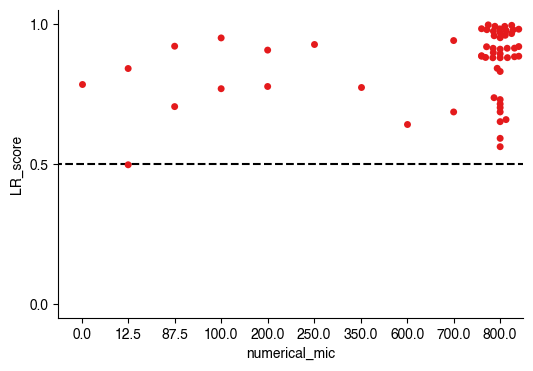

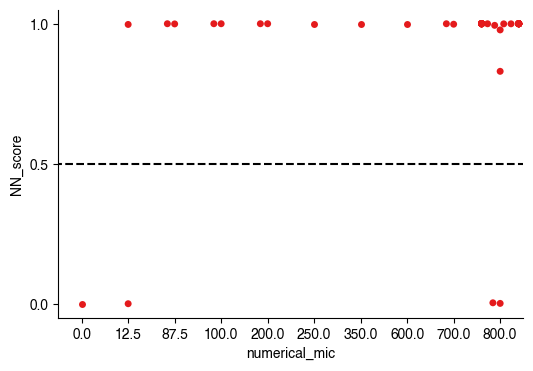

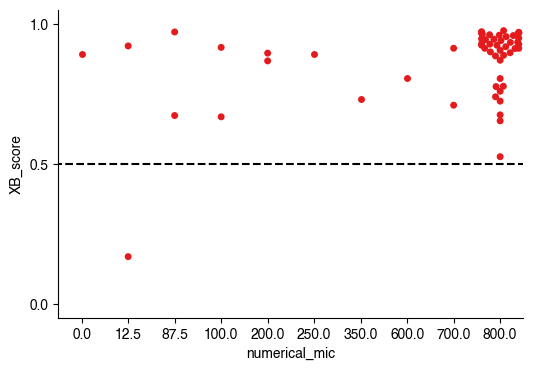

In [32]:
for model in ['LR', 'NN', 'XB']:

    fig = plt.figure(figsize=(6, 4))
    axes = seaborn.swarmplot(data=mics,y=model+'_score',x='numerical_mic', size=5, color='#e41a1c')
    axes.plot([-50,800], [0.5,0.5], 'k--')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.set_yticks([0,0.5,1])
    axes.plot([100,100], [0,1], 'k--')
    fig.savefig('pdf/supplemental/mic-swarm-'+model+'.pdf')

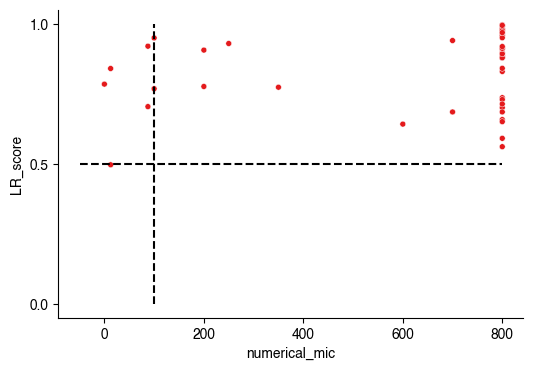

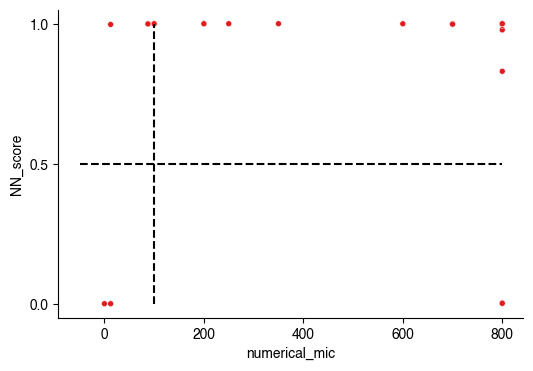

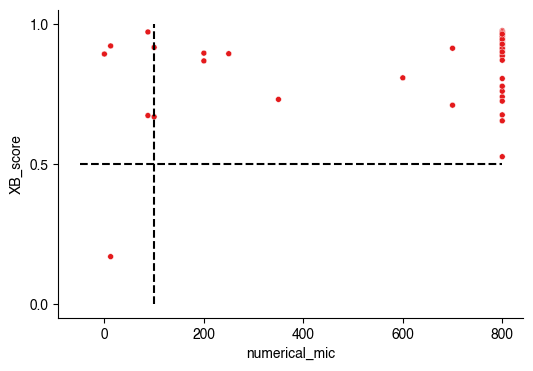

In [33]:
for model in ['LR', 'NN', 'XB']:
    fig = plt.figure(figsize=(6, 4))
    axes = seaborn.scatterplot(data=mics,y=model+'_score',x='numerical_mic', size=6, color='#e41a1c', legend=None)
    axes.plot([-50,800], [0.5,0.5], 'k--')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.set_yticks([0,0.5,1])
    axes.plot([100,100], [0,1], 'k--')
    fig.savefig('pdf/supplemental/mic-scatter-'+model+'.pdf')